<a href="https://colab.research.google.com/github/adewale-codes/Banking/blob/main/4327213_and_3012675_coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.3 MB/s eta 0:00:00


## Import libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report,  confusion_matrix, roc_curve, auc
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import numpy as np

## Data Preprocessing

In [ ]:
file_path = '/content/Ali New Spreadsheet (4).xlsx'
data = pd.read_excel(file_path)

X = data.drop(columns=['SAMPLE', 'Lab', 'C', 'M', 'R', 'T'])
y = data['T']

numeric_cols = X.select_dtypes(include=['number']).columns
X_numeric = X[numeric_cols]

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_numeric)

X_imputed = pd.DataFrame(X_imputed, columns=numeric_cols, index=X.index)

X = X.drop(columns=numeric_cols)
X = X.join(X_imputed)


scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_imputed)

X_normalized = pd.DataFrame(X_normalized, columns=numeric_cols)

X_normalized.head()

,CaO,SiO2,Na2O,TiO2,MnO,MgO,FeO,Al2O3,K2O,Mg#,...,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,Th,U
0,0.071384,-0.961437,0.075864,1.533196,-0.684652,-0.232759,-0.858870,1.748814,-0.859442,0.538372,...,-1.454536,-1.274577,-1.058000e+00,-1.386618e+00,-1.807290,-1.929148,-1.796393e+00,-1.345785e+00,-1.110566,-0.887545
1,0.286364,0.490999,0.100577,-0.320164,-1.642151,0.519800,-0.910153,-0.185784,-0.448275,0.843369,...,-1.991983,-2.072909,-2.696688e+00,-2.435531e+00,-2.055380,-1.990136,-2.260198e+00,-1.287048e+00,-1.083691,-0.924510
2,0.216961,1.360933,-0.826169,-1.185159,0.213003,1.140234,-0.905125,-1.506316,-0.653859,0.891814,...,-1.255915,-0.995485,-1.479377e+00,-1.858629e+00,-1.484773,-1.365014,-1.567757e+00,-1.384944e+00,-1.045297,-0.967312
3,1.520382,2.140596,-0.846763,-3.157633,4.402060,-2.640175,4.840088,-4.109892,-0.311220,-3.822518,...,0.000000,0.000000,1.039605e-15,-9.704394e-16,0.000000,0.000000,5.801995e-16,-4.347453e-16,0.000000,0.000000
4,1.723513,2.421292,-1.303958,-3.041355,3.908350,-2.392442,4.234244,-4.124677,-0.722387,-3.392463,...,0.000000,0.000000,1.039605e-15,-9.704394e-16,0.000000,0.000000,5.801995e-16,-4.347453e-16,0.000000,0.000000


In [ ]:
X['B']

,B
0,<2.87
1,<2.93
2,<2.84
3,NaN
4,NaN
...,...
648,NaN
649,NaN
650,<2.80
651,<2.67


In [ ]:
data['B']

,B
0,<2.87
1,<2.93
2,<2.84
3,NaN
4,NaN
...,...
648,NaN
649,NaN
650,<2.80
651,<2.67


## Data Visualization

### Histogram plot

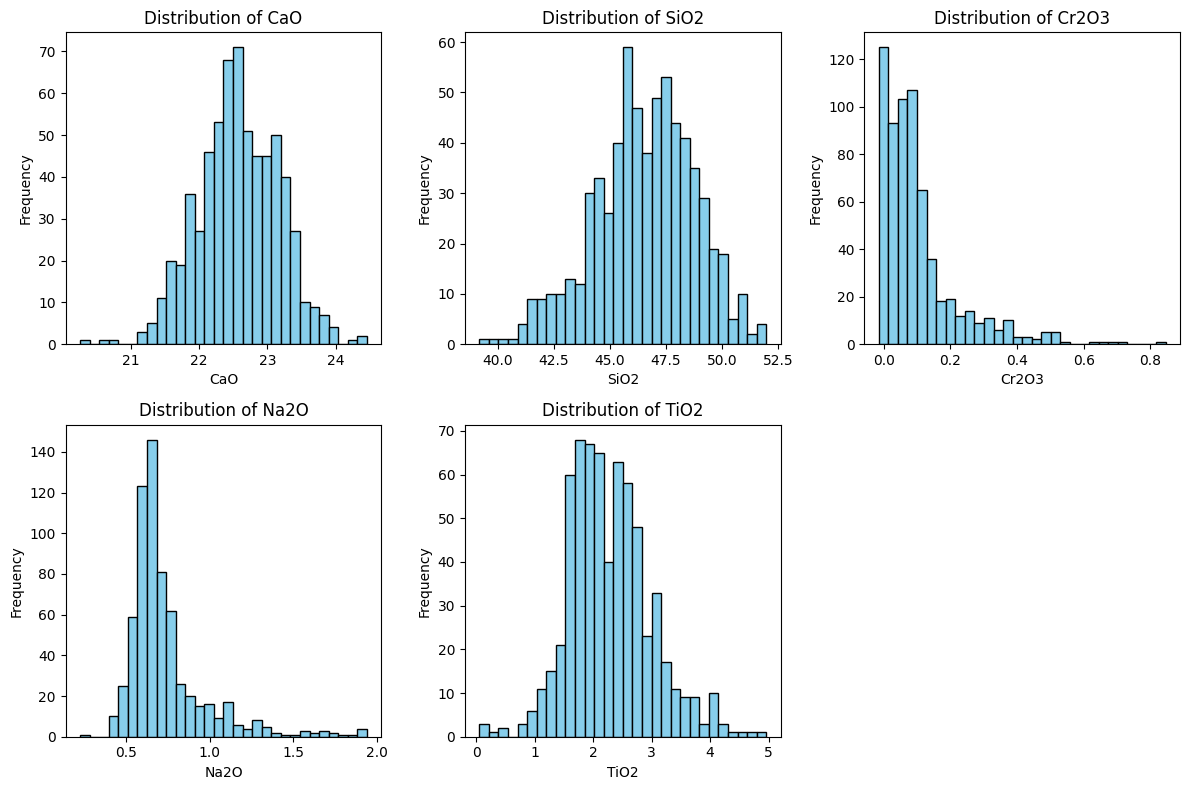

In [ ]:
elements_to_plot = ['CaO', 'SiO2', 'Cr2O3', 'Na2O', 'TiO2']
plt.figure(figsize=(12, 8))
for i, element in enumerate(elements_to_plot, 1):
    plt.subplot(2, 3, i)
    numeric_data = pd.to_numeric(data[element], errors='coerce')
    plt.hist(numeric_data.dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {element}')
    plt.xlabel(element)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Scatter plots

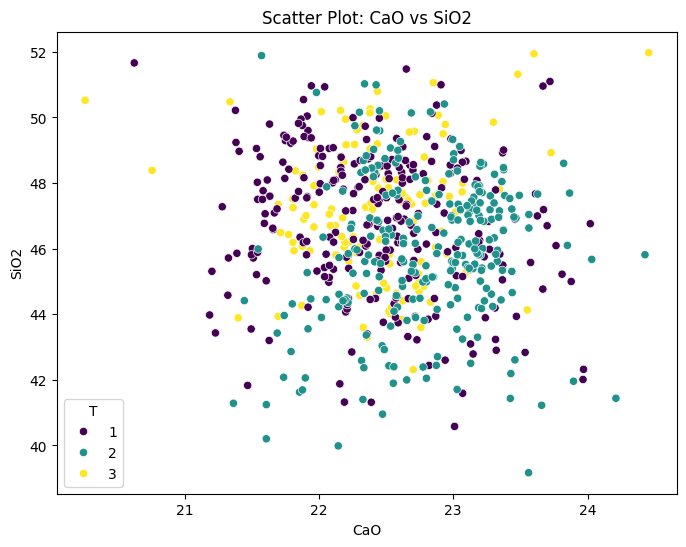

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['CaO'], y=data['SiO2'], hue=data['T'], palette='viridis')
plt.title('Scatter Plot: CaO vs SiO2')
plt.xlabel('CaO')
plt.ylabel('SiO2')
plt.show()

### Heatmap

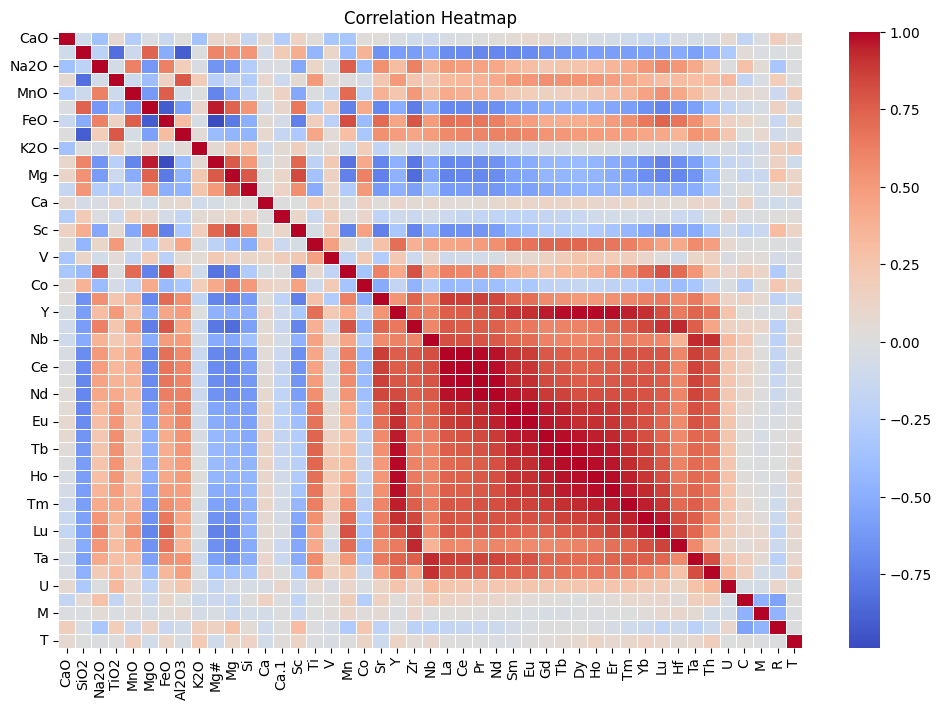

In [ ]:
plt.figure(figsize=(12, 8))
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Machine Learning Models

### Random Forest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_model = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

grid_search_rf.fit(X_train, y_train)

print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Cross-validation Score for Random Forest:", grid_search_rf.best_score_)

best_rf_model = grid_search_rf.best_estimator_

rf_predictions_best = best_rf_model.predict(X_test)
rf_report_best = classification_report(y_test, rf_predictions_best)
print("Random Forest Classification Report (after tuning):\n", rf_report_best)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
237 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Best Parameters for Random Forest: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-validation Score for Random Forest: 0.7550406115623507
Random Forest Classification Report (after tuning):
               precision    recall  f1-score   support

           1       0.73      0.74      0.73        82
           2       0.69      0.82      0.75        68
           3       0.87      0.59      0.70        46

    accuracy                           0.73       196
   macro avg       0.76      0.72      0.73       196
weighted avg       0.75      0.73      0.73       196



### SVM

In [ ]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto'],
    'degree': [3, 5]
}

svm_model = SVC(random_state=42)

grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2)

grid_search_svm.fit(X_train, y_train)

print("Best Parameters for SVM:", grid_search_svm.best_params_)
print("Best Cross-validation Score for SVM:", grid_search_svm.best_score_)

best_svm_model = grid_search_svm.best_estimator_

svm_predictions_best = best_svm_model.predict(X_test)
svm_report_best = classification_report(y_test, svm_predictions_best)
print("SVM Classification Report (after tuning):\n", svm_report_best)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters for SVM: {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-validation Score for SVM: 0.7790969899665552
SVM Classification Report (after tuning):
               precision    recall  f1-score   support

           1       0.70      0.74      0.72        82
           2       0.75      0.82      0.78        68
           3       0.79      0.59      0.68        46

    accuracy                           0.73       196
   macro avg       0.75      0.72      0.73       196
weighted avg       0.74      0.73      0.73       196



## Deep Learning Models

### FFNN

In [ ]:
dl_model_ff = Sequential()
dl_model_ff.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
dl_model_ff.add(Dropout(0.2))
dl_model_ff.add(Dense(64, activation='relu'))
dl_model_ff.add(Dropout(0.2))
dl_model_ff.add(Dense(1, activation='softmax'))

dl_model_ff.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

dl_model_ff.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

dl_loss_ff, dl_accuracy_ff = dl_model_ff.evaluate(X_test, y_test)

Epoch 1/50
15/15 [==============================] - 1s 17ms/step - loss: 0.1804 - accuracy: 0.3085 - val_loss: -1.2914 - val_accuracy: 0.4184
Epoch 2/50
15/15 [==============================] - 0s 5ms/step - loss: -1.9122 - accuracy: 0.3939 - val_loss: -4.0126 - val_accuracy: 0.4184
Epoch 3/50
15/15 [==============================] - 0s 5ms/step - loss: -4.6892 - accuracy: 0.3939 - val_loss: -8.3317 - val_accuracy: 0.4184
Epoch 4/50
15/15 [==============================] - 0s 5ms/step - loss: -9.1045 - accuracy: 0.3939 - val_loss: -15.7559 - val_accuracy: 0.4184
Epoch 5/50
15/15 [==============================] - 0s 5ms/step - loss: -17.0883 - accuracy: 0.3939 - val_loss: -27.8856 - val_accuracy: 0.4184
Epoch 6/50
15/15 [==============================] - 0s 5ms/step - loss: -30.0216 - accuracy: 0.3939 - val_loss: -47.6824 - val_accuracy: 0.4184
Epoch 7/50
15/15 [==============================] - 0s 5ms/step - loss: -49.3614 - accuracy: 0.3939 - val_loss: -78.4276 - val_accuracy: 0.4184

### CNN

In [ ]:
X_train_cnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

dl_model_cnn = Sequential()
dl_model_cnn.add(Conv1D(64, 3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
dl_model_cnn.add(MaxPooling1D(2))
dl_model_cnn.add(Conv1D(128, 3, activation='relu'))
dl_model_cnn.add(MaxPooling1D(2))
dl_model_cnn.add(Flatten())
dl_model_cnn.add(Dense(64, activation='relu'))
dl_model_cnn.add(Dropout(0.2))
dl_model_cnn.add(Dense(1, activation='softmax'))

dl_model_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

dl_model_cnn.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_cnn, y_test), callbacks=[early_stop])

dl_loss_cnn, dl_accuracy_cnn = dl_model_cnn.evaluate(X_test_cnn, y_test)

dl_accuracy_ff, dl_accuracy_cnn


Epoch 1/50
15/15 [==============================] - 1s 21ms/step - loss: -2.5607 - accuracy: 0.3939 - val_loss: -13.4462 - val_accuracy: 0.4184
Epoch 2/50
15/15 [==============================] - 0s 9ms/step - loss: -29.6666 - accuracy: 0.3939 - val_loss: -88.1075 - val_accuracy: 0.4184
Epoch 3/50
15/15 [==============================] - 0s 9ms/step - loss: -145.2992 - accuracy: 0.3939 - val_loss: -357.2995 - val_accuracy: 0.4184
Epoch 4/50
15/15 [==============================] - 0s 9ms/step - loss: -514.0905 - accuracy: 0.3939 - val_loss: -1067.4882 - val_accuracy: 0.4184
Epoch 5/50
15/15 [==============================] - 0s 8ms/step - loss: -1392.4011 - accuracy: 0.3939 - val_loss: -2687.8425 - val_accuracy: 0.4184
Epoch 6/50
15/15 [==============================] - 0s 8ms/step - loss: -3319.7229 - accuracy: 0.3939 - val_loss: -5855.0576 - val_accuracy: 0.4184
Epoch 7/50
15/15 [==============================] - 0s 8ms/step - loss: -6925.1191 - accuracy: 0.3939 - val_loss: -11557.69

(0.4183673560619354, 0.4183673560619354)

## Model Evaluation

In [ ]:
print("Random Forest Classifier Performance:")
print(rf_report_best)

print("\nSupport Vector Machine Performance:")
print(svm_report_best)

print("\nFeedforward Neural Network Accuracy:", dl_accuracy_ff)
print("Convolutional Neural Network Accuracy:", dl_accuracy_cnn)

Random Forest Classifier Performance:
              precision    recall  f1-score   support

           1       0.73      0.74      0.73        82
           2       0.69      0.82      0.75        68
           3       0.87      0.59      0.70        46

    accuracy                           0.73       196
   macro avg       0.76      0.72      0.73       196
weighted avg       0.75      0.73      0.73       196


Support Vector Machine Performance:
              precision    recall  f1-score   support

           1       0.70      0.74      0.72        82
           2       0.75      0.82      0.78        68
           3       0.79      0.59      0.68        46

    accuracy                           0.73       196
   macro avg       0.75      0.72      0.73       196
weighted avg       0.74      0.73      0.73       196


Feedforward Neural Network Accuracy: 0.4183673560619354
Convolutional Neural Network Accuracy: 0.4183673560619354


In [ ]:
class_labels = np.unique(y_test)

In [ ]:
rf_classification_report = classification_report(y_test, rf_predictions_best, output_dict=True)
svm_classification_report = classification_report(y_test, svm_predictions_best, output_dict=True)

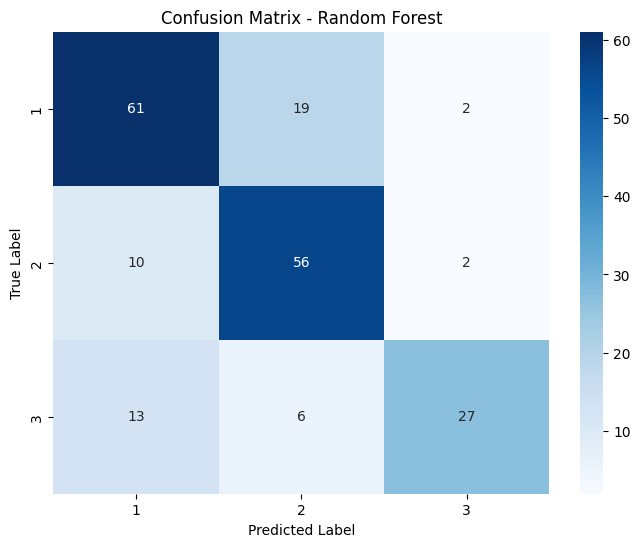

In [ ]:
rf_cm = confusion_matrix(y_test, rf_predictions_best)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

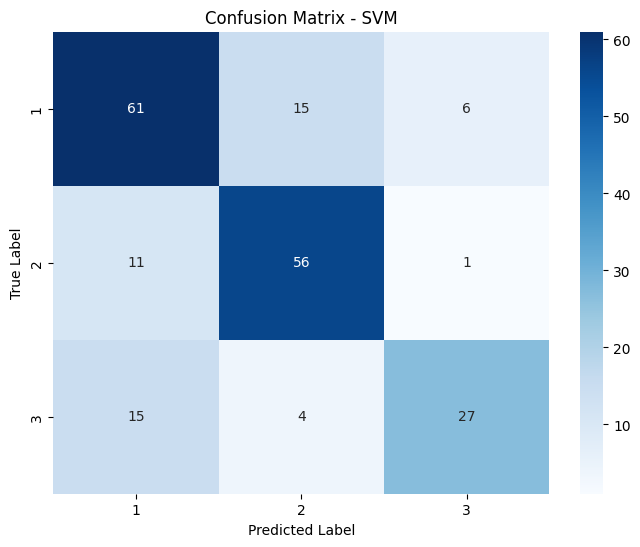

In [ ]:
svm_cm = confusion_matrix(y_test, svm_predictions_best)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

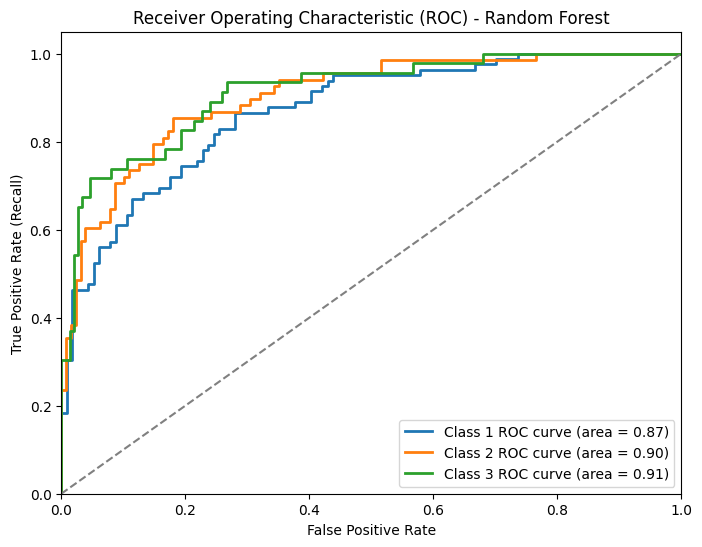

In [ ]:
y_test_bin = label_binarize(y_test, classes=class_labels)

plt.figure(figsize=(8, 6))
for i, class_label in enumerate(class_labels):
    rf_fpr, rf_tpr, _ = roc_curve(y_test_bin[:, i], best_rf_model.predict_proba(X_test)[:, i])
    rf_roc_auc = auc(rf_fpr, rf_tpr)
    plt.plot(rf_fpr, rf_tpr, lw=2, label=f'Class {class_label} ROC curve (area = {rf_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")
plt.show()

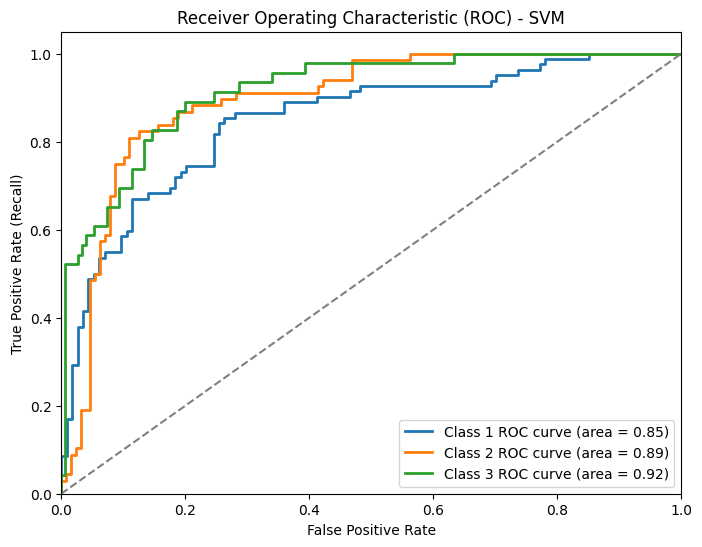

In [ ]:
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(class_labels):
    svm_fpr, svm_tpr, _ = roc_curve(y_test_bin[:, i], best_svm_model.decision_function(X_test)[:, i])  # Class-specific
    svm_roc_auc = auc(svm_fpr, svm_tpr)
    plt.plot(svm_fpr, svm_tpr, lw=2, label=f'Class {class_label} ROC curve (area = {svm_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) - SVM')
plt.legend(loc="lower right")
plt.show()

In [ ]:
rf_precision = [rf_classification_report[str(class_label)]['precision'] for class_label in class_labels]
rf_recall = [rf_classification_report[str(class_label)]['recall'] for class_label in class_labels]
rf_f1 = [rf_classification_report[str(class_label)]['f1-score'] for class_label in class_labels]

In [ ]:
svm_precision = [svm_classification_report[str(class_label)]['precision'] for class_label in class_labels]
svm_recall = [svm_classification_report[str(class_label)]['recall'] for class_label in class_labels]
svm_f1 = [svm_classification_report[str(class_label)]['f1-score'] for class_label in class_labels]

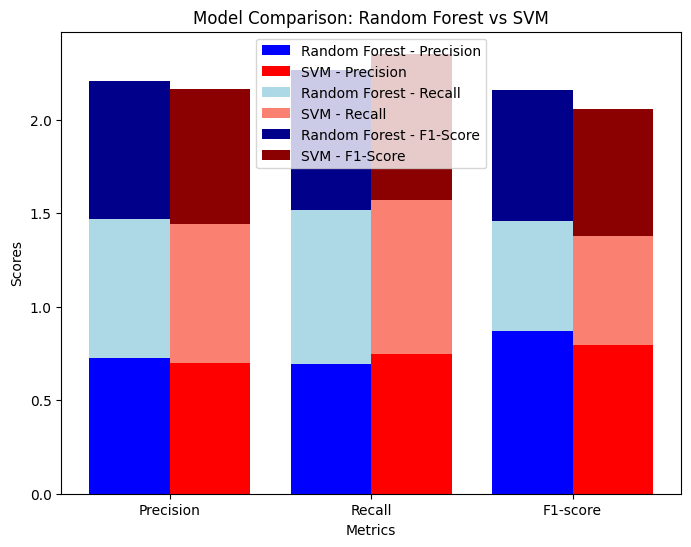

In [ ]:
metrics = ['Precision', 'Recall', 'F1-score']

x = np.arange(len(metrics))

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(x - 0.2, rf_precision, 0.4, label='Random Forest - Precision', color='blue')
ax.bar(x + 0.2, svm_precision, 0.4, label='SVM - Precision', color='red')

ax.bar(x - 0.2, rf_recall, 0.4, bottom=rf_precision, label='Random Forest - Recall', color='lightblue')
ax.bar(x + 0.2, svm_recall, 0.4, bottom=svm_precision, label='SVM - Recall', color='salmon')

ax.bar(x - 0.2, rf_f1, 0.4, bottom=np.add(rf_precision, rf_recall), label='Random Forest - F1-Score', color='darkblue')
ax.bar(x + 0.2, svm_f1, 0.4, bottom=np.add(svm_precision, svm_recall), label='SVM - F1-Score', color='darkred')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison: Random Forest vs SVM')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()


In [ ]:
class_labels = np.unique(y_test)

In [ ]:
ffnn_classification_report = classification_report(y_test, dl_model_ff.predict(X_test) > 0.5, output_dict=True)
cnn_classification_report = classification_report(y_test, dl_model_cnn.predict(X_test_cnn) > 0.5, output_dict=True)

7/7 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [ ]:
ffnn_accuracy = dl_model_ff.evaluate(X_test, y_test)[1]
cnn_accuracy = dl_model_cnn.evaluate(X_test_cnn, y_test)[1]

7/7 [==============================] - 0s 3ms/step - loss: -60890100.0000 - accuracy: 0.4184


In [ ]:
ffnn_precision = [ffnn_classification_report[str(class_label)]['precision'] for class_label in class_labels]
ffnn_recall = [ffnn_classification_report[str(class_label)]['recall'] for class_label in class_labels]
ffnn_f1 = [ffnn_classification_report[str(class_label)]['f1-score'] for class_label in class_labels]

cnn_precision = [cnn_classification_report[str(class_label)]['precision'] for class_label in class_labels]
cnn_recall = [cnn_classification_report[str(class_label)]['recall'] for class_label in class_labels]
cnn_f1 = [cnn_classification_report[str(class_label)]['f1-score'] for class_label in class_labels]

7/7 [==============================] - 0s 1ms/step


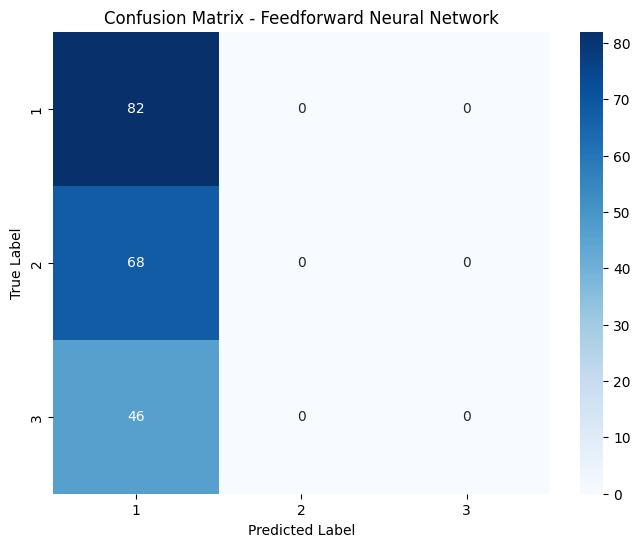

In [ ]:
ffnn_cm = confusion_matrix(y_test, dl_model_ff.predict(X_test) > 0.5)
plt.figure(figsize=(8, 6))
sns.heatmap(ffnn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - Feedforward Neural Network")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

7/7 [==============================] - 0s 3ms/step


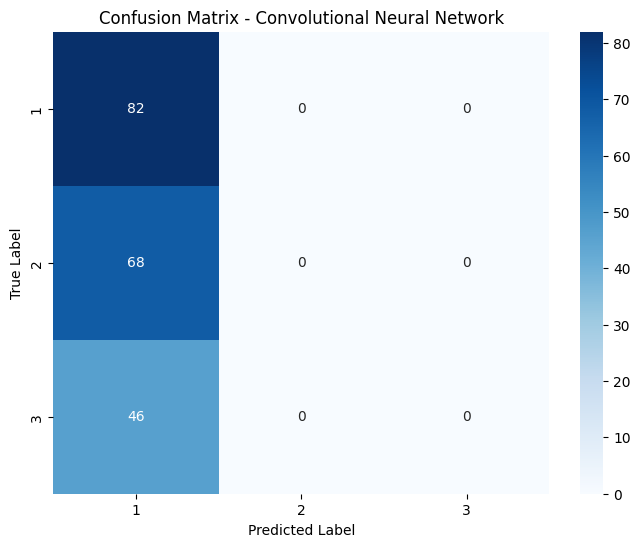

In [ ]:
cnn_cm = confusion_matrix(y_test, dl_model_cnn.predict(X_test_cnn) > 0.5)
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - Convolutional Neural Network")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

7/7 [==============================] - 0s 1ms/step


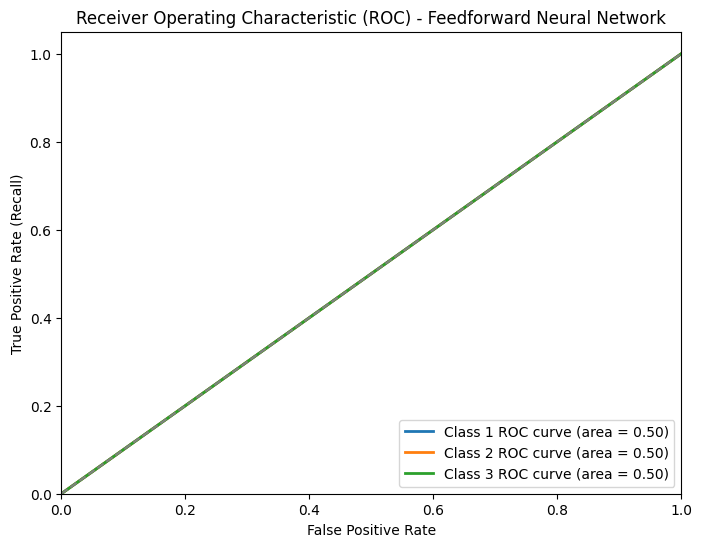

In [ ]:
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(class_labels):
    ffnn_fpr, ffnn_tpr, _ = roc_curve(y_test_bin[:, i], dl_model_ff.predict(X_test))
    ffnn_roc_auc = auc(ffnn_fpr, ffnn_tpr)
    plt.plot(ffnn_fpr, ffnn_tpr, lw=2, label=f'Class {class_label} ROC curve (area = {ffnn_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) - Feedforward Neural Network')
plt.legend(loc="lower right")
plt.show()

7/7 [==============================] - 0s 2ms/step


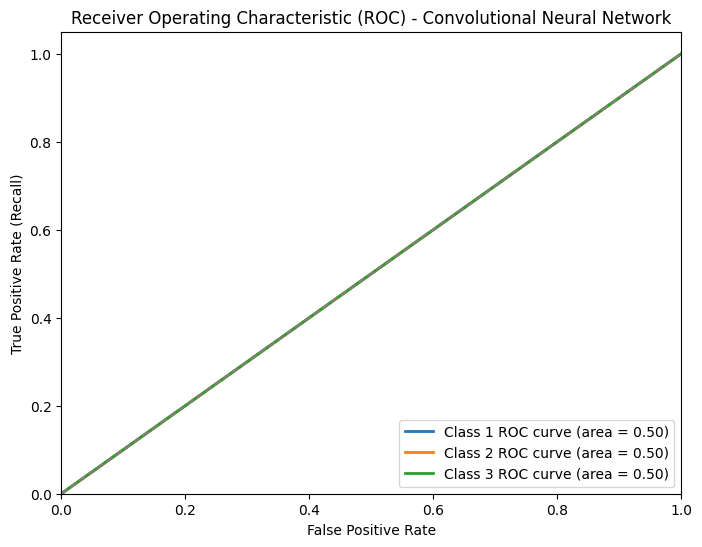

In [ ]:
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(class_labels):
    cnn_fpr, cnn_tpr, _ = roc_curve(y_test_bin[:, i], dl_model_cnn.predict(X_test_cnn))
    cnn_roc_auc = auc(cnn_fpr, cnn_tpr)
    plt.plot(cnn_fpr, cnn_tpr, lw=2, label=f'Class {class_label} ROC curve (area = {cnn_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) - Convolutional Neural Network')
plt.legend(loc="lower right")
plt.show()

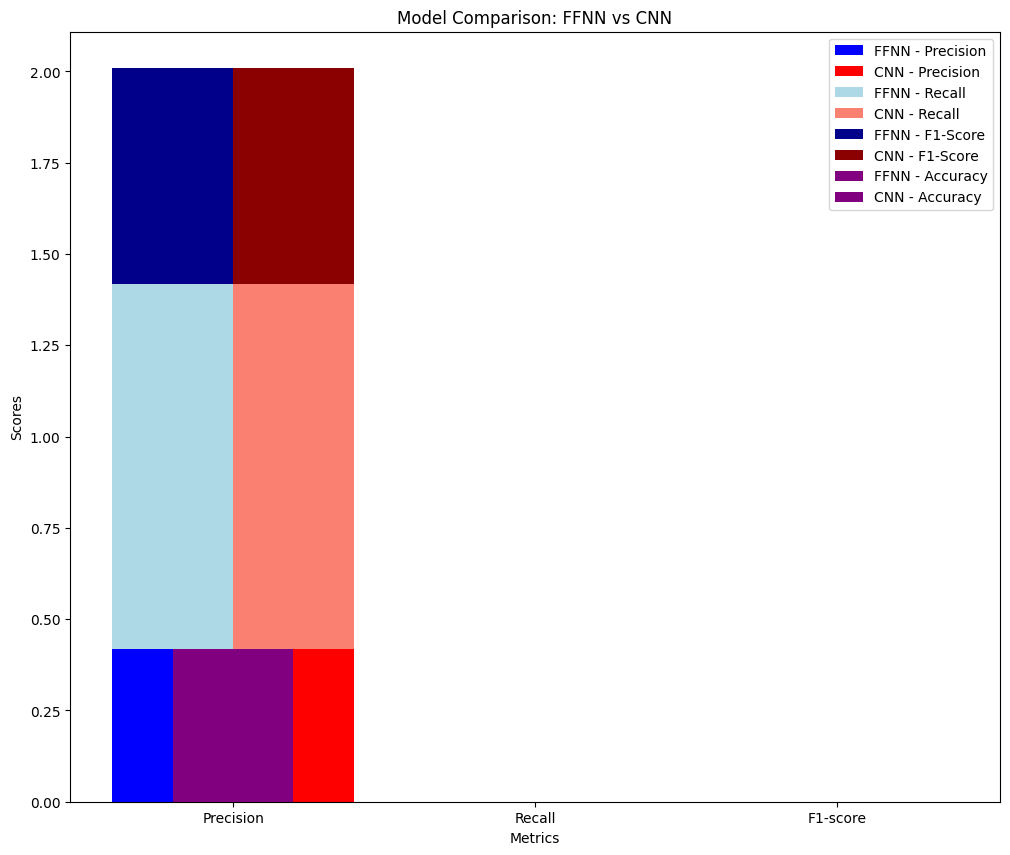

In [ ]:
metrics = ['Precision', 'Recall', 'F1-score']

x = np.arange(len(metrics))

fig, ax = plt.subplots(figsize=(12, 10))

ax.bar(x - 0.2, ffnn_precision, 0.4, label='FFNN - Precision', color='blue')
ax.bar(x + 0.2, cnn_precision, 0.4, label='CNN - Precision', color='red')

ax.bar(x - 0.2, ffnn_recall, 0.4, bottom=ffnn_precision, label='FFNN - Recall', color='lightblue')
ax.bar(x + 0.2, cnn_recall, 0.4, bottom=cnn_precision, label='CNN - Recall', color='salmon')

ax.bar(x - 0.2, ffnn_f1, 0.4, bottom=np.add(ffnn_precision, ffnn_recall), label='FFNN - F1-Score', color='darkblue')
ax.bar(x + 0.2, cnn_f1, 0.4, bottom=np.add(cnn_precision, cnn_recall), label='CNN - F1-Score', color='darkred')

accuracy_values = [ffnn_accuracy, cnn_accuracy]
ax.bar(x[0] - 0.1, ffnn_accuracy, 0.2, label='FFNN - Accuracy', color='purple')
ax.bar(x[0] + 0.1, cnn_accuracy, 0.2, label='CNN - Accuracy', color='purple')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison: FFNN vs CNN')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()


In [ ]:
rf_classification_report = classification_report(y_test, rf_predictions_best, output_dict=True)
svm_classification_report = classification_report(y_test, svm_predictions_best, output_dict=True)
ffnn_classification_report = classification_report(y_test, dl_model_ff.predict(X_test) > 0.5, output_dict=True)
cnn_classification_report = classification_report(y_test, dl_model_cnn.predict(X_test_cnn) > 0.5, output_dict=True)

metrics_data = {
    'Model': ['Random Forest', 'SVM', 'FFNN', 'CNN'],
    'Accuracy': [rf_classification_report['accuracy'], svm_classification_report['accuracy'], ffnn_accuracy, cnn_accuracy],
    'Precision': [rf_classification_report['weighted avg']['precision'], svm_classification_report['weighted avg']['precision'], ffnn_classification_report['weighted avg']['precision'], cnn_classification_report['weighted avg']['precision']],
    'Recall': [rf_classification_report['weighted avg']['recall'], svm_classification_report['weighted avg']['recall'], ffnn_classification_report['weighted avg']['recall'], cnn_classification_report['weighted avg']['recall']],
    'F1-Score': [rf_classification_report['weighted avg']['f1-score'], svm_classification_report['weighted avg']['f1-score'], ffnn_classification_report['weighted avg']['f1-score'], cnn_classification_report['weighted avg']['f1-score']]
}

metrics_df = pd.DataFrame(metrics_data)

display(metrics_df)

7/7 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.734694,0.748084,0.734694,0.732852
1,SVM,0.734694,0.738760,0.734694,0.732163
2,FFNN,0.418367,0.175031,0.418367,0.246807
3,CNN,0.418367,0.175031,0.418367,0.246807
